# mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Resume Parser')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Resume Parser'

# installing prerequisites

In [ ]:
pip install spacy==2.3.5 --user

     |████████████████████████████████| 10.4 MB 15.8 MB/s 
     |████████████████████████████████| 1.0 MB 48.3 MB/s 


In [ ]:
pip install gensim==3.4.0

     |████████████████████████████████| 22.2 MB 1.4 MB/s 
  Created wheel for gensim: filename=gensim-3.4.0-cp37-cp37m-linux_x86_64.whl size=23316714 sha256=b159e853e3d62cff7420f51c935c2e4542986bec653c11a9aef7321afdc297b4
  Stored in directory: /root/.cache/pip/wheels/de/a4/46/4e18f7d25915b16e0e790a5362e455aba6cadc486994806c05
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0 MB 21.2 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019121 sha256=f784a71d36bba94240b5b6ebf9ac478a277d806a4c53eb9531ca02a1d9a169a5
  Stored in directory: /root/.cache/pip/wheels/64/69/41/6f820cf1d7488a0381a2059f66ec9f8f23116f7c67d18f3d8d
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


# creating word embedding vectors

In [ ]:
from gensim.models import Word2Vec
import string
import re
from nltk.corpus import stopwords

with open('skills.txt',encoding="utf-8") as f:
  content=f.readlines()
content=[x.strip() for x in content]#removing white spaces

In [ ]:
content

['Data science is a multi-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data. Data science is the same concept as data mining and big data: "use the most powerful hardware, the most powerful programming systems, and the most efficient algorithms to solve problems".',
 'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.',
 'In 2012, when Harvard Business 

In [ ]:
content[1]

'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.'

# preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize 
import gensim
from gensim.models.phrases import Phraser,Phrases

x=[]
for line in content:
  tokens=word_tokenize(line)
  tok=[w.lower() for w in tokens]
  table=str.maketrans('','',string.punctuation)#removing punctuation marks
  str1=[w.translate(table) for w in tok]
  words=[word for word in str1 if word.isalpha()]#removing spl characters
  stop_words=set(stopwords.words('english'))
  words=[w for w in words if not w in stop_words]#removing stop words
  x.append(words)

In [ ]:
texts=x

In [ ]:
print(texts)

[['data', 'science', 'multidisciplinary', 'field', 'uses', 'scientific', 'methods', 'processes', 'algorithms', 'systems', 'extract', 'knowledge', 'insights', 'structured', 'unstructured', 'data', 'data', 'science', 'concept', 'data', 'mining', 'big', 'data', 'use', 'powerful', 'hardware', 'powerful', 'programming', 'systems', 'efficient', 'algorithms', 'solve', 'problems'], ['data', 'science', 'concept', 'unify', 'statistics', 'data', 'analysis', 'machine', 'learning', 'related', 'methods', 'order', 'understand', 'analyze', 'actual', 'phenomena', 'data', 'employs', 'techniques', 'theories', 'drawn', 'many', 'fields', 'within', 'context', 'mathematics', 'statistics', 'information', 'science', 'computer', 'science', 'turing', 'award', 'winner', 'jim', 'gray', 'imagined', 'data', 'science', 'fourth', 'paradigm', 'science', 'empirical', 'theoretical', 'computational', 'datadriven', 'asserted', 'everything', 'science', 'changing', 'impact', 'information', 'technology', 'data', 'deluge'], ['

# removing commonly occuring words that are not useful

In [ ]:
with open('common.txt') as f:
  content2=f.read()

ntexts=[]
l=len(texts)
for j in range(l):
  s=texts[j]
  res=[k for k in s if k not in content2]#removing common words from the skill
  ntexts.append(res)

In [ ]:
print(texts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [ ]:
print(ntexts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [ ]:
print(len(texts))
print(len(ntexts))

316
316


In [ ]:
texts=ntexts
content=texts

# creating bigrams

In [ ]:
common_terms=["of","with","without","and","or","the","a","an"]
x=ntexts
phrases=Phrases(x,common_terms=common_terms)
bigram=Phraser(phrases)
all_sentences=list(bigram[x])
model=gensim.models.Word2Vec(all_sentences,size=5000,min_count=2,workers=4,window=4)
model.save("final.model")
wrds=list(model.wv.vocab)
print(len(wrds))

1240


# testing

In [ ]:
z=model.wv.most_similar("machine_learning")

In [ ]:
print(z)

[('software', 0.12883757054805756), ('data_science', 0.12143438309431076), ('programming_language', 0.1115763783454895), ('systems', 0.11121988296508789), ('programming', 0.10845110565423965), ('international', 0.10270408540964127), ('may', 0.1015128642320633), ('applications', 0.10070759057998657), ('data', 0.0992579534649849), ('software_development', 0.09901046007871628)]


# Resume Parsing

In [ ]:
pip install pdfminer.six

     |████████████████████████████████| 5.6 MB 21.8 MB/s 
     |████████████████████████████████| 3.6 MB 51.1 MB/s 


In [ ]:

import os
from os import listdir
from os.path import isfile,join
import pandas as pd
from io import StringIO
from collections import Counter
import en_core_web_sm
nlp=en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [ ]:
mypath='Resumes'
onlyfiles=[os.path.join(mypath,f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,f))]

In [ ]:
onlyfiles

['Resumes/Saisri.pdf',
 'Resumes/Alekhya.pdf',
 'Resumes/Atmakuri Venkata Gayatri Resume.pdf',
 'Resumes/Jahnavi janu resume.pdf',
 'Resumes/Jaya Chandrika Atchuta.pdf']

# function to read words from resume

In [ ]:
import collections
from pdfminer.high_level import extract_text
def pdfextract(file):
  text=extract_text(file)
  return(text)

# creating candidate profile

In [ ]:
def create_profile(file):
  model=Word2Vec.load("final.model")
  text=str(pdfextract(file))
  text=text.replace("\n","")
  text=text.lower()
  print(text)

  stats=[nlp(text[0]) for text in model.wv.most_similar("statistics")]
  NLP=[nlp(text[0]) for text in model.wv.most_similar("language")]
  ML=[nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
  DL=[nlp(text[0]) for text in model.wv.most_similar("deep")]
  python=[nlp(text[0]) for text in model.wv.most_similar("python")]
  DE=[nlp(text[0]) for text in model.wv.most_similar("data")]

  matcher=PhraseMatcher(nlp.vocab)
  matcher.add('stats',None,*stats)
  matcher.add('NLP',None,*NLP)
  matcher.add('ML',None,*ML)
  matcher.add('DL',None,*DL)
  matcher.add('python',None,*python)
  matcher.add('DE',None,*DE)
  doc=nlp(text)

  d=[]
  matchers=matcher(doc)
  for match_id,start,end in matchers:
    r=nlp.vocab.strings[match_id]
    span=doc[start:end]
    d.append((r,span.text))
  
  keywords="\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
  print("Keywords")
  print(keywords)

  df=pd.read_csv(StringIO(keywords),names=['keywords_list'])
  df1=pd.DataFrame(df.keywords_list.str.split(' ',1).tolist(),columns=['subject','keyword'])
  df2=pd.DataFrame(df1.keyword.str.split('(',1).tolist(),columns=['keyword','count'])
  df3=pd.concat([df1['subject'],df2['keyword'],df2['count']],axis=1)
  df3['count']=df3['count'].apply(lambda x: x.rstrip(")"))

  base=os.path.basename(file)
  filename=os.path.splitext(base)[0]
  name=filename.split('_')
  name=name[0]
  name=name.lower()
  name=pd.read_csv(StringIO(name),names=['candidate name'])
  dataf=pd.concat([name['candidate name'],df3['subject'],df3['keyword'],df3['count']],axis=1)
  dataf['candidate name'].fillna(dataf['candidate name'].iloc[0],inplace=True)
  print(dataf)
  return dataf


In [ ]:
final_db=pd.DataFrame()
i=0
while i<len(onlyfiles):
  file=onlyfiles[i]
  d=create_profile(file)
  i+=1
  final_db=final_db.append(d)
  

alapati sai sri    mahalsaisri@gmail.com    8074267573   career objective:          to associate myself with an esteemed organization where i can utilize my technical and interpersonal skills in contributing effectively towards the growth of organization that offers me a professional growth while being resourceful, innovative, and flexible.     educational summary:    qualification   institution   university/board   year of passing   percentage   st. ann’s college of   engineering and technology,  chirala.   surya junior  college,  bapatla.   b.tech(cse)   intermediate   ssc   gems high school, bapatla.   jntu kakinada   2022   8.0 cgpa   board of   intermediate  education,    andhra pradesh.   board of secondary  education,   andhra pradesh.   2018   97%   2016   9.7 gpa   certification:    •  got certificate of achievement from guvi  for successful completion of build a  face recognition application using python.   achievements and activities:    •  participated in cruisers elite eve

In [ ]:
final_db2=final_db['keyword'].groupby([final_db['candidate name'],final_db['subject']]).count().unstack()
final_db2.reset_index(inplace=True)
final_db2.fillna(0,inplace=True)
candidate_data=final_db2.iloc[:,1:]
candidate_data.index=final_db2['candidate name']
cd=candidate_data.to_csv('candidate_profile.csv')
cd_profile=pd.read_csv('candidate_profile.csv')

In [ ]:
cd_profile

,candidate name,DE,DL,ML,NLP,python,stats
0,alekhya,0.0,1.0,0.0,0.0,1.0,0.0
1,atmakuri venkata gayatri resume,1.0,0.0,1.0,0.0,0.0,1.0
2,jahnavi janu resume,0.0,0.0,0.0,0.0,0.0,1.0
3,jaya chandrika atchuta,0.0,1.0,0.0,0.0,2.0,1.0
4,saisri,1.0,2.0,0.0,1.0,2.0,2.0


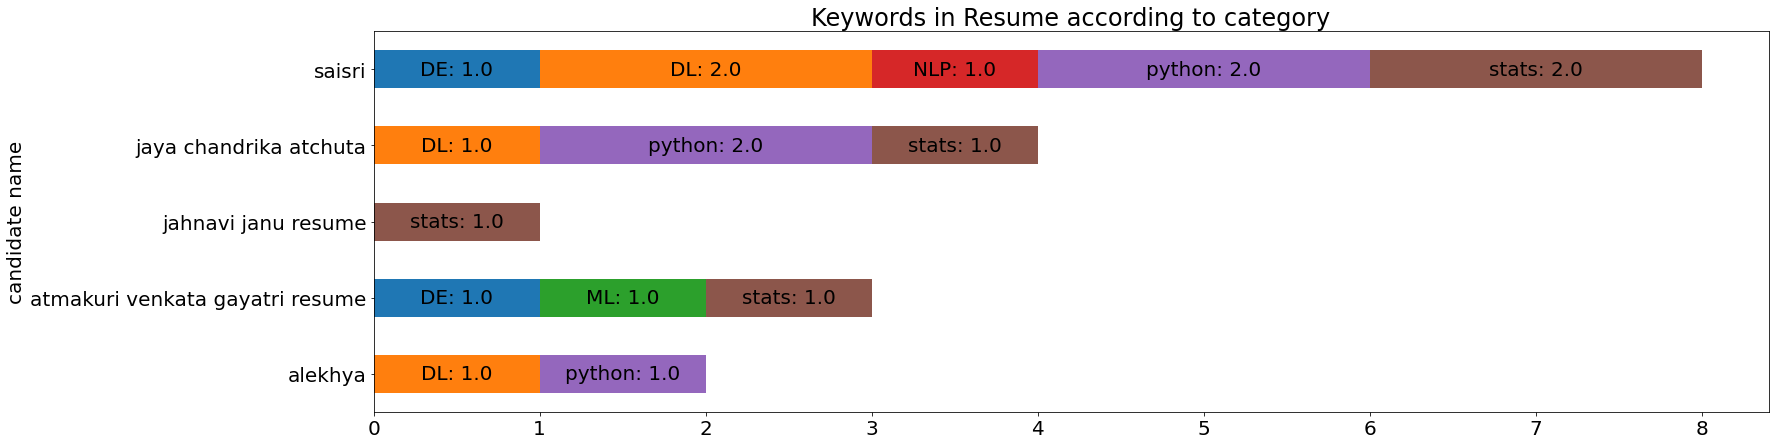

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams.update({'font.size': 20}) 
ax = candidate_data.plot.barh(title="Keywords in Resume according to category", legend=False, figsize=(25,7), stacked=True) 
skills = [] 
for j in candidate_data.columns: 
    for i in candidate_data.index: 
        skill = str(j)+": " + str(candidate_data.loc[i][j]) 
        skills.append(skill) 
patches = ax.patches 
for skill, rect in zip(skills, patches): 
    width = rect.get_width() 
    if width > 0: 
        x = rect.get_x() 
        y = rect.get_y() 
        height = rect.get_height() 
        ax.text(x + width/2., y + height/2., skill, ha='center', va='center') 
plt.show()

In [ ]:
from nltk.corpus import stopwords
sw=set(stopwords.words('english'))
print(sw)

{'it', 'm', 'did', 'didn', 'haven', 'am', 'have', 'those', 'don', 'is', 'me', "didn't", 'under', 'will', 'has', 'of', 'very', 'herself', 'won', 'theirs', 'with', 'ours', "you're", 'if', "you've", 'by', 'you', 'be', 'our', "shan't", 'ourselves', 's', "isn't", "wouldn't", 'shan', 'the', 't', "mustn't", 'aren', "weren't", 'both', 'were', 'couldn', 're', 'wasn', 'while', 'before', 'further', 'itself', "you'll", 'himself', 'myself', 'an', 'now', "won't", 'ma', 'between', 'all', 'above', 'hadn', 'too', 'hers', 'because', 'own', 'as', 'yourselves', 'over', 'what', "shouldn't", 'her', "you'd", 'nor', "hasn't", 'needn', "should've", 'y', 'themselves', 'there', 'that', 'mightn', 'yourself', "hadn't", 'in', 'again', 'll', 'doesn', "that'll", "haven't", 'but', 'not', 'should', 'how', "mightn't", 'why', 'below', 'being', "couldn't", 'here', 'weren', 'does', 'out', 'had', 'on', 'was', 'isn', 'then', 'some', "wasn't", 'having', "don't", 'my', 'each', 'and', 'to', "she's", 'up', 'o', 'hasn', 'yours', 

In [ ]:
print(len(sw))

179
